In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import geopandas as gpd
import pandas as pd
import shapely
import matplotlib.pyplot as plt
import numpy as np
from shapely.wkt import loads
from shapely.geometry import Polygon, Point, shape

In [3]:
ntl = pd.read_csv('../dataset/filtered_nighttime_lights.csv')
ntl

,city_code,city,state,count,avg,lat,long,radiance,geometry,index_right,CD_MUN,NM_MUN,SIGLA,AREA_KM2,w_radiance
0,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.620832,0.229079,POINT (-63.6208324023 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.229079
1,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.616666,0.255802,POINT (-63.6166657356 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.255802
2,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.612499,0.220094,POINT (-63.61249906889999 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.220094
3,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.608332,0.231341,POINT (-63.60833240219999 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.231341
4,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.604166,0.225163,POINT (-63.6041657355 -7.979167330500005),16,1100205,Porto Velho,RO,34090.952,0.225163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061809,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.329166,0.318521,POINT (-47.329165605300005 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.318521
1061810,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.324999,0.364663,POINT (-47.3249989386 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.364663
1061811,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.320832,0.336667,POINT (-47.3208322719 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.336667
1061812,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.316666,0.280574,POINT (-47.3166656052 -16.045834061700006),5571,5300108,Brasília,DF,5760.784,0.280574


In [4]:
# ntl dataframe to geo datafram
geo_ntl = gpd.GeoDataFrame(
      ntl, geometry=gpd.points_from_xy(ntl.long, ntl.lat))
del geo_ntl['index_right']
geo_ntl

,city_code,city,state,count,avg,lat,long,radiance,geometry,CD_MUN,NM_MUN,SIGLA,AREA_KM2,w_radiance
0,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.620832,0.229079,POINT (-63.62083 -7.97917),1100205,Porto Velho,RO,34090.952,0.229079
1,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.616666,0.255802,POINT (-63.61667 -7.97917),1100205,Porto Velho,RO,34090.952,0.255802
2,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.612499,0.220094,POINT (-63.61250 -7.97917),1100205,Porto Velho,RO,34090.952,0.220094
3,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.608332,0.231341,POINT (-63.60833 -7.97917),1100205,Porto Velho,RO,34090.952,0.231341
4,1100205,Porto Velho,RO,161691,0.419370,-7.979167,-63.604166,0.225163,POINT (-63.60417 -7.97917),1100205,Porto Velho,RO,34090.952,0.225163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061809,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.329166,0.318521,POINT (-47.32917 -16.04583),5300108,Brasília,DF,5760.784,0.318521
1061810,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.324999,0.364663,POINT (-47.32500 -16.04583),5300108,Brasília,DF,5760.784,0.364663
1061811,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.320832,0.336667,POINT (-47.32083 -16.04583),5300108,Brasília,DF,5760.784,0.336667
1061812,5300108,Brasília,DF,27866,8.090337,-16.045834,-47.316666,0.280574,POINT (-47.31667 -16.04583),5300108,Brasília,DF,5760.784,0.280574


In [5]:
# Carregar o arquivo shapefile com GeoPandas
shapefile = gpd.read_file('../../dataset/inputs/BR_Municipios_2021/BR_Municipios_2021.shp')
shapefile

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.42801 -16.62789, -48.42803 -16.6..."
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.84740 -17.57796, -49.84719 -17.5..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.10998 -14.67195, -47.10994 -14.6..."
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.75572 -14.86393, -48.75502 -14.8..."


In [6]:
def create_grid(gdf=None, bounds=None, resolution=1, overlap=False, crs="EPSG:29902"):
    """Create square grid that covers a geodataframe area
    or a fixed boundary with x-y coords
    returns: a GeoDataFrame of grid polygons
    see https://james-brennan.github.io/posts/fast_gridding_geopandas/
    """

    if bounds != None:
        xmin, ymin, xmax, ymax= bounds
    else:
        xmin, ymin, xmax, ymax= gdf.total_bounds

    # get cell size
    cell_size = resolution * 0.009
    # create the cells in a loop
    grid_cells = []
    for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
        for y0 in np.arange(ymin, ymax+cell_size, cell_size):
            x1 = x0-cell_size
            y1 = y0+cell_size
            poly = shapely.geometry.box(x0, y0, x1, y1)
            #print (gdf.overlay(poly, how='intersection'))
            grid_cells.append( poly )

    cells = gpd.GeoDataFrame(grid_cells, columns=['geometry'],
                                     crs=crs)
    if overlap == True:
        cols = ['grid_id','geometry','grid_area']
        cells = cells.sjoin(gdf, how='inner').drop_duplicates('geometry')
    
    cells['area'] = cells.area
    cells['centroid'] = cells.centroid
    return cells

In [7]:
def getAvgNTL(gdf, grid_area):
    print('total de grids: ', len(grid_area))
    all_points = geo_ntl[geo_ntl['city_code'] == int(gdf.iloc[0]['CD_MUN'])]
    print('total de ntl: ', len(all_points))

    count = 1
    for i, row in grid_area.iterrows():
        # print('row: ', row)
        row['geometry'] = shape(row['geometry'])
        row['centroid'] = shape(row['centroid'])

        # Criar um GeoDataFrame a partir da row
        gdf = gpd.GeoDataFrame.from_records([row])
        join = gpd.sjoin(all_points, gdf, op='within')
        mean = join.mean()['w_radiance']
        grid_area.loc[i, 'avg_ntl'] = mean
        count = count + 1
        # break
    return grid_area

In [8]:
# shapefile = shapefile[shapefile['CD_MUN'] == '3550308']
# shapefile.to_file('../dataset/shapefiles/sp/sp.shp')
# fig,ax = plt.subplots(1,3,figsize=(14,7))
# axs=ax.flat
# gr = create_grid(shapefile, resolution=1, overlap=True, crs="EPSG:29902")
# intersecao = gpd.overlay(gr, shapefile, how='intersection')
# shapefile.plot(ec='gray',fc="none",figsize=(10,10),ax=axs[0])
# intersecao.plot(fc="none", ec='black',ax=axs[1])
# gr.plot(fc="none", ec='black',ax=axs[2])


In [10]:
intersections = gpd.GeoDataFrame(columns=['CD_MUN', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry', 'area', 'centroid', 'avg_ntl'])
total_grid_area = gpd.GeoDataFrame(columns=['CD_MUN', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry', 'area', 'centroid', 'avg_ntl'])
count = 0
city_codes = geo_ntl["city_code"].drop_duplicates()
for i, row in city_codes.iteritems():
    city = shapefile[shapefile['CD_MUN'] == str(row)]
    print('Criando Grid: ', city.NM_MUN)
    print('count: ', count)
    intersection = create_grid(city, resolution=1, overlap=True, crs="EPSG:29902")
    del intersection['index_right']
    intersections = gpd.GeoDataFrame(pd.concat([intersections, intersection]))
    grid_area = getAvgNTL(city, intersection)
    total_grid_area = gpd.GeoDataFrame(pd.concat([total_grid_area, grid_area]))
    count = count + 1

Criando Grid:  16    Porto Velho
Name: NM_MUN, dtype: object
count:  0
total de grids:  35763
total de ntl:  161691
Criando Grid:  66    Rio Branco
Name: NM_MUN, dtype: object
count:  1
total de grids:  9439
total de ntl:  41977
Criando Grid:  111    Manaus
Name: NM_MUN, dtype: object
count:  2
total de grids:  11851
total de ntl:  53299
Criando Grid:  138    Boa Vista
Name: NM_MUN, dtype: object
count:  3
total de grids:  5913
total de ntl:  26726
Criando Grid:  160    Ananindeua
Name: NM_MUN, dtype: object
count:  4
total de grids:  247
total de ntl:  888
Criando Grid:  169    Belém
Name: NM_MUN, dtype: object
count:  5
total de grids:  1188
total de ntl:  4964
Criando Grid:  216    Marabá
Name: NM_MUN, dtype: object
count:  6
total de grids:  15942
total de ntl:  71109
Criando Grid:  240    Parauapebas
Name: NM_MUN, dtype: object
count:  7
total de grids:  7304
total de ntl:  32361
Criando Grid:  264    Santarém
Name: NM_MUN, dtype: object
count:  8
total de grids:  18505
total de n

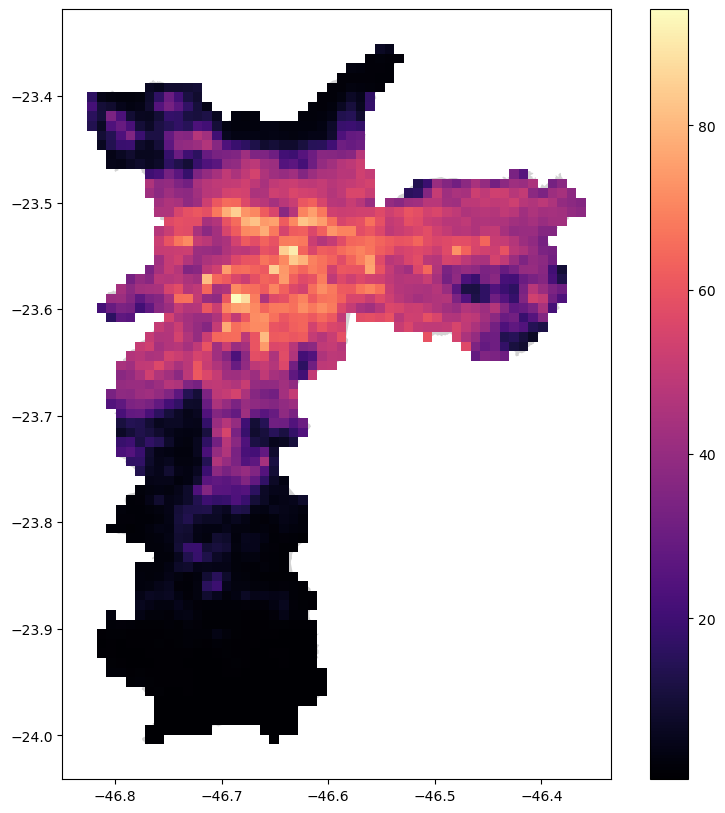

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

background = shapefile[shapefile['CD_MUN'] == '3550308']
background.plot(ax=ax, linewidth=0.5, color='#D3D3D3')

ntl_grid = total_grid_area[total_grid_area['CD_MUN'] == '3550308']
ntl_grid.plot(column='avg_ntl', cmap='magma', legend=True, ax=ax)

plt.show()

In [12]:
del total_grid_area['centroid']
total_grid_area.to_file('../dataset/shapefiles/br/grid_area.shp')